## **Análise exploratória**

In [7]:
#Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [8]:
#Importando arquivos

from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [9]:
#Criando o DataFrame

df = pd.read_excel ('/content/drive/MyDrive/Colab DIO/AdventureWorks.xlsx')

In [10]:
#Visualizando 3 primeiras linhas

df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [11]:
#Verificando o número de linhas e colunas

df.shape

(904, 16)

In [12]:
#Verificando os tipos de dados

df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [15]:
#Exibindo a receita total

df["Valor Venda"].sum()

5984606.1426

In [14]:
#Exibindo o total de produtos vendidos

df["Quantidade"].sum()

56907

In [16]:
#Criando uma coluna de custo para exibir o total de custo

df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) 


In [17]:
#Verificando o resultado

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [18]:
#Calculando o custo total

round(df["custo"].sum(), 2)

2486783.05

In [19]:
#Criando uma coluna de lucro para exibir o lucro total

df["lucro"]  = df["Valor Venda"] - df["custo"]

In [20]:
#Verificando o resultado

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [21]:
#Calculando o lucro total
round(df["lucro"].sum(),2)

3497823.09

In [27]:
#Criando uma coluna para exibir o tempo de envio do produto

df["Tempo de Envio"] = df["Data Envio"] - df["Data Venda"]

In [28]:
#Verificando o resultado

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio,Tempo de Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20,20 days


In [29]:
#Calculando apenas os dias

df["Tempo de Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [30]:
#Verificando o resultado

df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio,Tempo de Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20,20


In [32]:
#Verificando o tipo da coluna Tempo de Envio

df["Tempo de Envio"].dtype

dtype('int64')

In [33]:
#Tempo de envio médio por Marca

df.groupby("Marca")["Tempo de Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo de Envio, dtype: float64

In [37]:
#Verificando se há dados faltantes

df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
Tempo de Envio    0
dtype: int64

In [38]:
#Agrupando por ano e marca

df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [39]:
pd.options.display.float_format = '{:20,.2f}'.format

In [40]:
#Resetando o index

lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [42]:
#Quantidade total de produtos vendidos de forma crescente

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True)

Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

# **Exibindo gráficos**

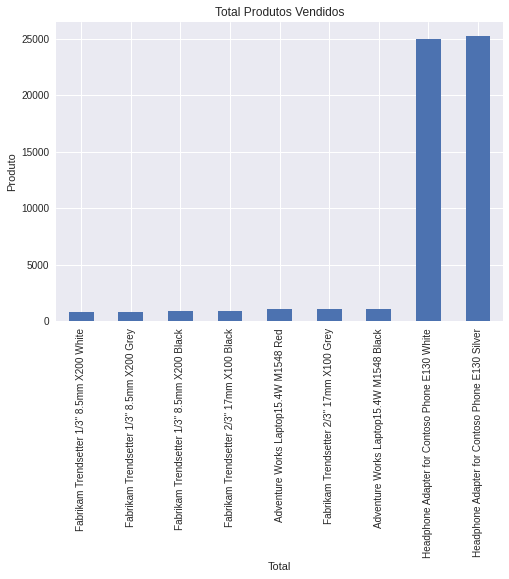

In [44]:
#Total de produtos vendidos

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.bar(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

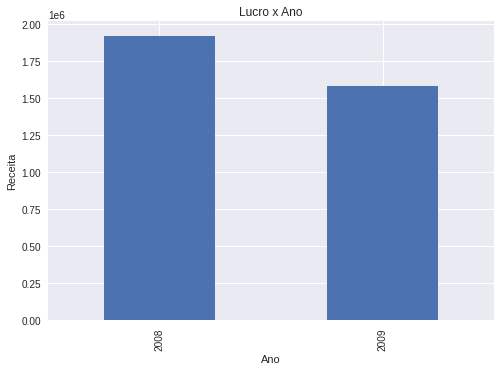

In [45]:
#Lucro por ano

df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [47]:
#Lucro por dia

df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [48]:
#Vendas no ano de 2009

df_2009 = df[df["Data Venda"].dt.year == 2009]

In [50]:
#Verificando o resultado

df_2009.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio,Tempo de Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12,12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11,11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12,12


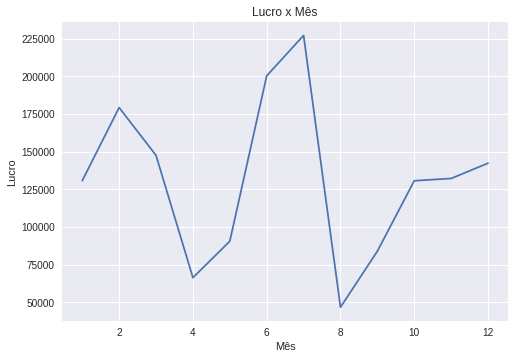

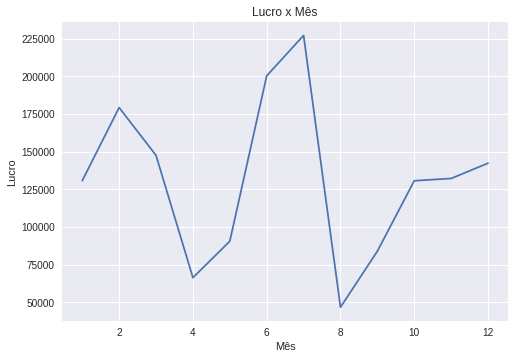

In [53]:
#Lucro por mês no ano de 2009

df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

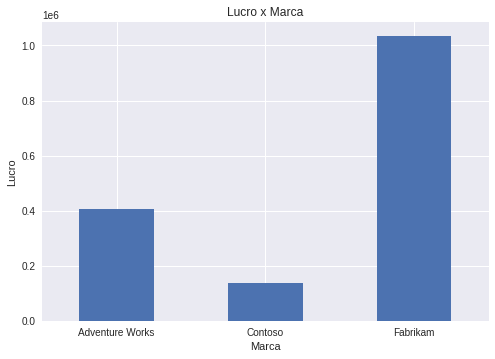

In [52]:
#Lucro por marca

df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

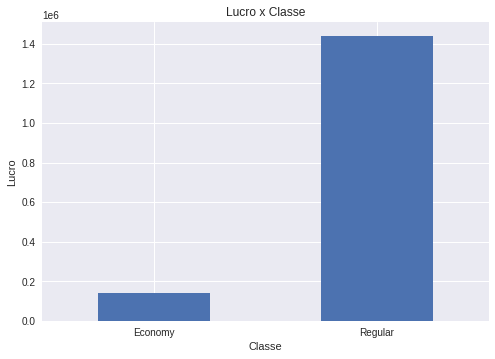

In [54]:
#Lucro por classe

df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

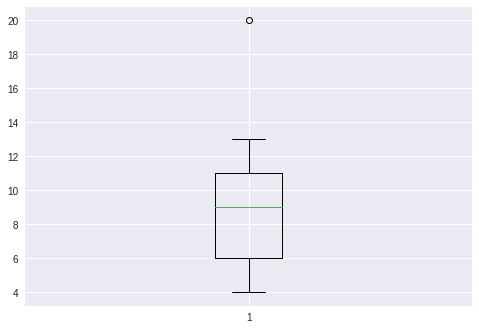

In [55]:
#Teste de Boxplot utilizando o tempo de envio
plt.boxplot(df["Tempo de Envio"]);

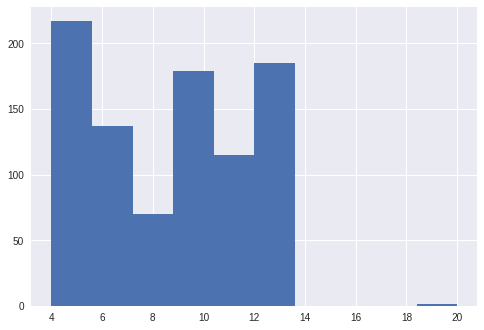

In [57]:
#Histograma do tempo de envio
plt.hist(df["Tempo de Envio"]);

In [58]:
#Exibindo o menor tempo de envio
df["Tempo de envio"].min()

4

In [59]:
#Exibindo o maior tempo de envio
df['Tempo de envio'].max()

20

In [60]:
#O Outlier
df[df["Tempo de envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio,Tempo de Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20,20


In [61]:
#Exibindo as estatísticas

df["Tempo de envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

In [62]:
#Exportando para uma planilha CSV

df.to_csv("df_vendas_novo.csv", index=False)